In [4]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import glob

import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
new

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), " images resized.")
    
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/scissor'
resize_images(image_dir_path)

97  images to be resized.
97  images resized.


In [11]:
# 바위 이미지

image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/rock'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [12]:
# 보 이미지
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/paper'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [18]:
def load_data(img_path, number_of_data=297):
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)
    idx = 0
    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx, :, :, :]=img
        labels[idx]=0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx, :, :, :]=img
        labels[idx]=1
        dix=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
    return imgs, labels
    
image_dir_path = os.getenv('HOME') +'/aiffel/rock_scissor_paper'
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (297, 28, 28, 3)
y_train shape: (297,)


라벨:  0


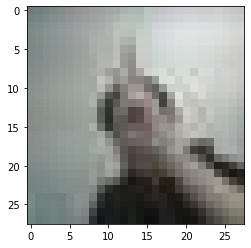

In [19]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.9158
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 0.9461
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9697
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 7.5169e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 7.8870e-04 - accuracy: 1.0000


In [25]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), " images resized.")
    
# 테스트 가위 이미지    
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [26]:
# rock
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/rock'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [27]:
# 보 이미지
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [28]:
def load_data(img_path, number_of_data=300):
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)
    idx = 0
    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx, :, :, :]=img
        labels[idx]=0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx, :, :, :]=img
        labels[idx]=1
        dix=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
    return imgs, labels

image_dir_path = os.getenv('HOME') +'/aiffel/rock_scissor_paper/test'
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_train/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

10/10 - 0s - loss: 221.5125 - accuracy: 0.6667
test_loss: 221.5124969482422
test_accuracy: 0.6666666865348816
